In [7]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

root_dir = Path.cwd().parent
sys.path.insert(0,str(root_dir))

# from placefield_dynamics.cluster_analysis import cluster_analysis
from placefield_dynamics.cluster_analysis_plots import cluster_analysis_plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
path_data = Path('../../data')

mouse = '579ad'
suffix = '_redetected'

def get_all_paths(paths_session,paths):
	paths = [(list(filter(lambda path: path.is_relative_to(session),paths)) or [None])[0] for session in paths_session]
	return paths


path_mouse = path_data / mouse

path_matching = path_mouse / 'matching' / f'neuron_registration{suffix}.pkl'

paths_session = sorted(path_mouse.glob('Session*'))

paths_behavior = sorted(path_mouse.glob(f'Session*/aligned_behavior.pkl'))
paths_place_field_detection = sorted(path_mouse.glob(f'Session*/placefield_detection*{suffix}.hdf5'))
# paths_place_field_detection = [path for ]
paths_neuron_detection = sorted(path_mouse.glob(f'Session*/results*{suffix}.hdf5'))

paths_behavior = get_all_paths(paths_session,paths_behavior)
paths_place_field_detection = get_all_paths(paths_session,paths_place_field_detection)
paths_neuron_detection = get_all_paths(paths_session,paths_neuron_detection)

c = cluster_analysis_plots(path_mouse,path_matching,paths_behavior,paths_place_field_detection, paths_neuron_detection)


In [ ]:
c.run_complete()
# c.setup_plots()
# c.get_matching()
# c.get_behavior()
# c.get_stats()
# c.get_PC_fields()
# print(c.thr['A_rate'])
# c.update_status(A_thr=0,A0_thr=0,reliability_thr=0.2,sigma_thr=.5,fr_thr=0.01,CI_thr=0)
# c.calculate_field_firingrates()
# c.compareSessions()
# c.stability = c.calculate_placefield_stability(
# 	dsMax=c.data["nSes"], n_processes=8, N_bs=1000
# )
# c.save()


../../data/579ad/matching/match_model_redetected.pkl
found proper fit @times=0
../../data/579ad/matching/neuron_registration_redetected.pkl


Fields obtained and saved, time spend: 0.4787
update fields


Function calculate_placefield_stability took 1.0650 seconds
update fields


/home/wollex/Documents/Science/WolfGroup/PlaceFields/Programs/PC_analysis/placefield_dynamics/placefield_detection
/home/wollex/Documents/Science/WolfGroup/PlaceFields/Programs/PC_analysis/placefield_dynamics/placefield_detection
/home/wollex/Documents/Science/WolfGroup/PlaceFields/Programs/PC_analysis/placefield_dynamics/placefield_detection
/home/wollex/Documents/Science/WolfGroup/PlaceFields/Programs/PC_analysis/placefield_dynamics/placefield_detection
/home/wollex/Documents/Science/WolfGroup/PlaceFields/Programs/PC_analysis/placefield_dynamics/placefield_detection
/home/wollex/Documents/Science/WolfGroup/PlaceFields/Programs/PC_analysis/placefield_dynamics/placefield_detection
/home/wollex/Documents/Science/WolfGroup/PlaceFields/Programs/PC_analysis/placefield_dynamics/placefield_detection
/home/wollex/Documents/Science/WolfGroup/PlaceFields/Programs/PC_analysis/placefield_dynamics/placefield_detection
Function calculate_placefield_stability took 9.2085 seconds


In [4]:
c.status['activity'].sum(axis=0)

array([[574, 491,  97,   0,   0,   0],
       [425, 378,  81,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [318, 292,  79,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [565, 445, 131,   0,   0,   0],
       [555, 446, 175,   0,   0,   0],
       [600, 505, 156,   0,   0,   0],
       [556, 468, 140,   0,   0,   0],
       [585, 492, 151,   0,   0,   0],
       [557, 472, 225,   0,   0,   0],
       [532, 427, 195,   0,   0,   0],
       [497, 395, 192,   0,   0,   0],
       [486, 386, 155,   0,   0,   0],
       [526, 401, 134,   0,   0,   0],
       [582, 413, 182,   0,   0,   0],
       [545, 399, 148,   0,   0,   0],
       [546, 402, 196,   0,   0,   0],
       [534, 439, 208,   0,   0,   0],
       [584, 445, 158,   0,   0,   0]])

491


'\n\t[ ] fix: stability plot\n    [ ] fix: which neurons are considered to be active? fitness? SNR? firingrate? which threshold? which combination?\n'

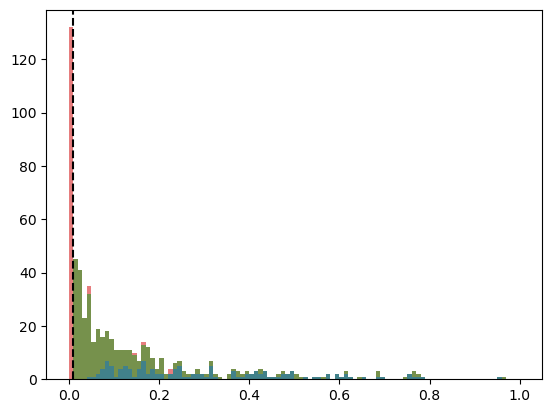

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
s = 5
ax.hist(c.stats['firingrate'][:,s],bins=np.linspace(0,1,101),alpha=0.6,color='tab:red')
ax.hist(c.stats['firingrate'][c.status['activity'][:,s,1],s],bins=np.linspace(0,1,101),alpha=0.6,color='tab:green')
ax.hist(c.stats['firingrate'][c.status['activity'][:,s,2],s],bins=np.linspace(0,1,101),alpha=0.6,color='tab:blue')
ax.axvline(0.01,color='k',linestyle='--')

print(c.status['activity'][:,0,1].sum())

"""
	[x] fix: stability plot
    [ ] fix: which neurons are considered to be active? fitness? SNR? firingrate? which threshold? which combination?
"""


(array([[ 0.,  0.,  0.,  1.,  2.,  1.,  4.,  6.,  8., 11.,  8.,  5.,  5.,
          9., 10.,  7.,  9.,  4.,  4.,  7.,  5.,  0.,  4.,  1.,  2.,  3.,
          4.,  2.,  1.,  0.,  0.,  2.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,
          1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
          0.,  0.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
          2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([0.01  , 0.1098, 0.2096, 0.3094, 0.4092, 0.509 , 0.6088, 0.7086,
        0.8084, 0.9082, 1.008 , 1.1078, 1.2076, 1.3074, 1.4072, 1.507 ,
        1.6068, 1.7066, 1.8064, 1.9062, 2.006 , 2.1058, 2.2056, 2.3054,
        2.4052, 2.505 , 2.6048, 2.7046, 2.8044, 2.9042, 3.004 , 3.1038,
        3.2036, 3.3034, 3.4032, 3.503 , 3.6028, 3.7026, 3.8024, 3.9022,
        4.002 , 4.1018, 4.2016, 4.3014, 4.4012, 4.501 , 4.6008, 

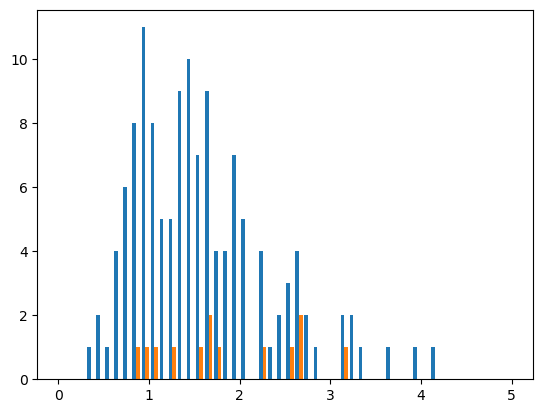

In [9]:
fig = plt.figure()
s = 5
ax = fig.add_subplot(111)
ax.hist(c.fields['amplitude'][c.status['activity'][:,s,2],s,:,0],bins=np.linspace(0.01,5,51))


### plot cell activity statistics ###
active neurons: 35.7 +/- 4.28
silent neurons: 64.3 +/- 4.28
coding neurons: 54.9 +/- 15.2
non-coding neurons: 45.1 +/- 15.2
KstestResult(statistic=0.057291666666666664, pvalue=0.3011095615330806, statistic_location=0, statistic_sign=1)
time taken: 0.01
time taken: 0.48
IPI
KstestResult(statistic=0.1684027777777778, pvalue=1.5105158186495313e-07, statistic_location=0.6666666666666667, statistic_sign=1)
IAI
KstestResult(statistic=0.09895833333333333, pvalue=0.007070651374402303, statistic_location=-0.0714285714285714, statistic_sign=1)
0.6760580269911656
0.11968799616489947
get CI from bootstrapping


INFO:matplotlib.mathtext:Substituting symbol L from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol L from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol L from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol L from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol L from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol L from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol L from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol L from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol L from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol L from STIXNonUnicode


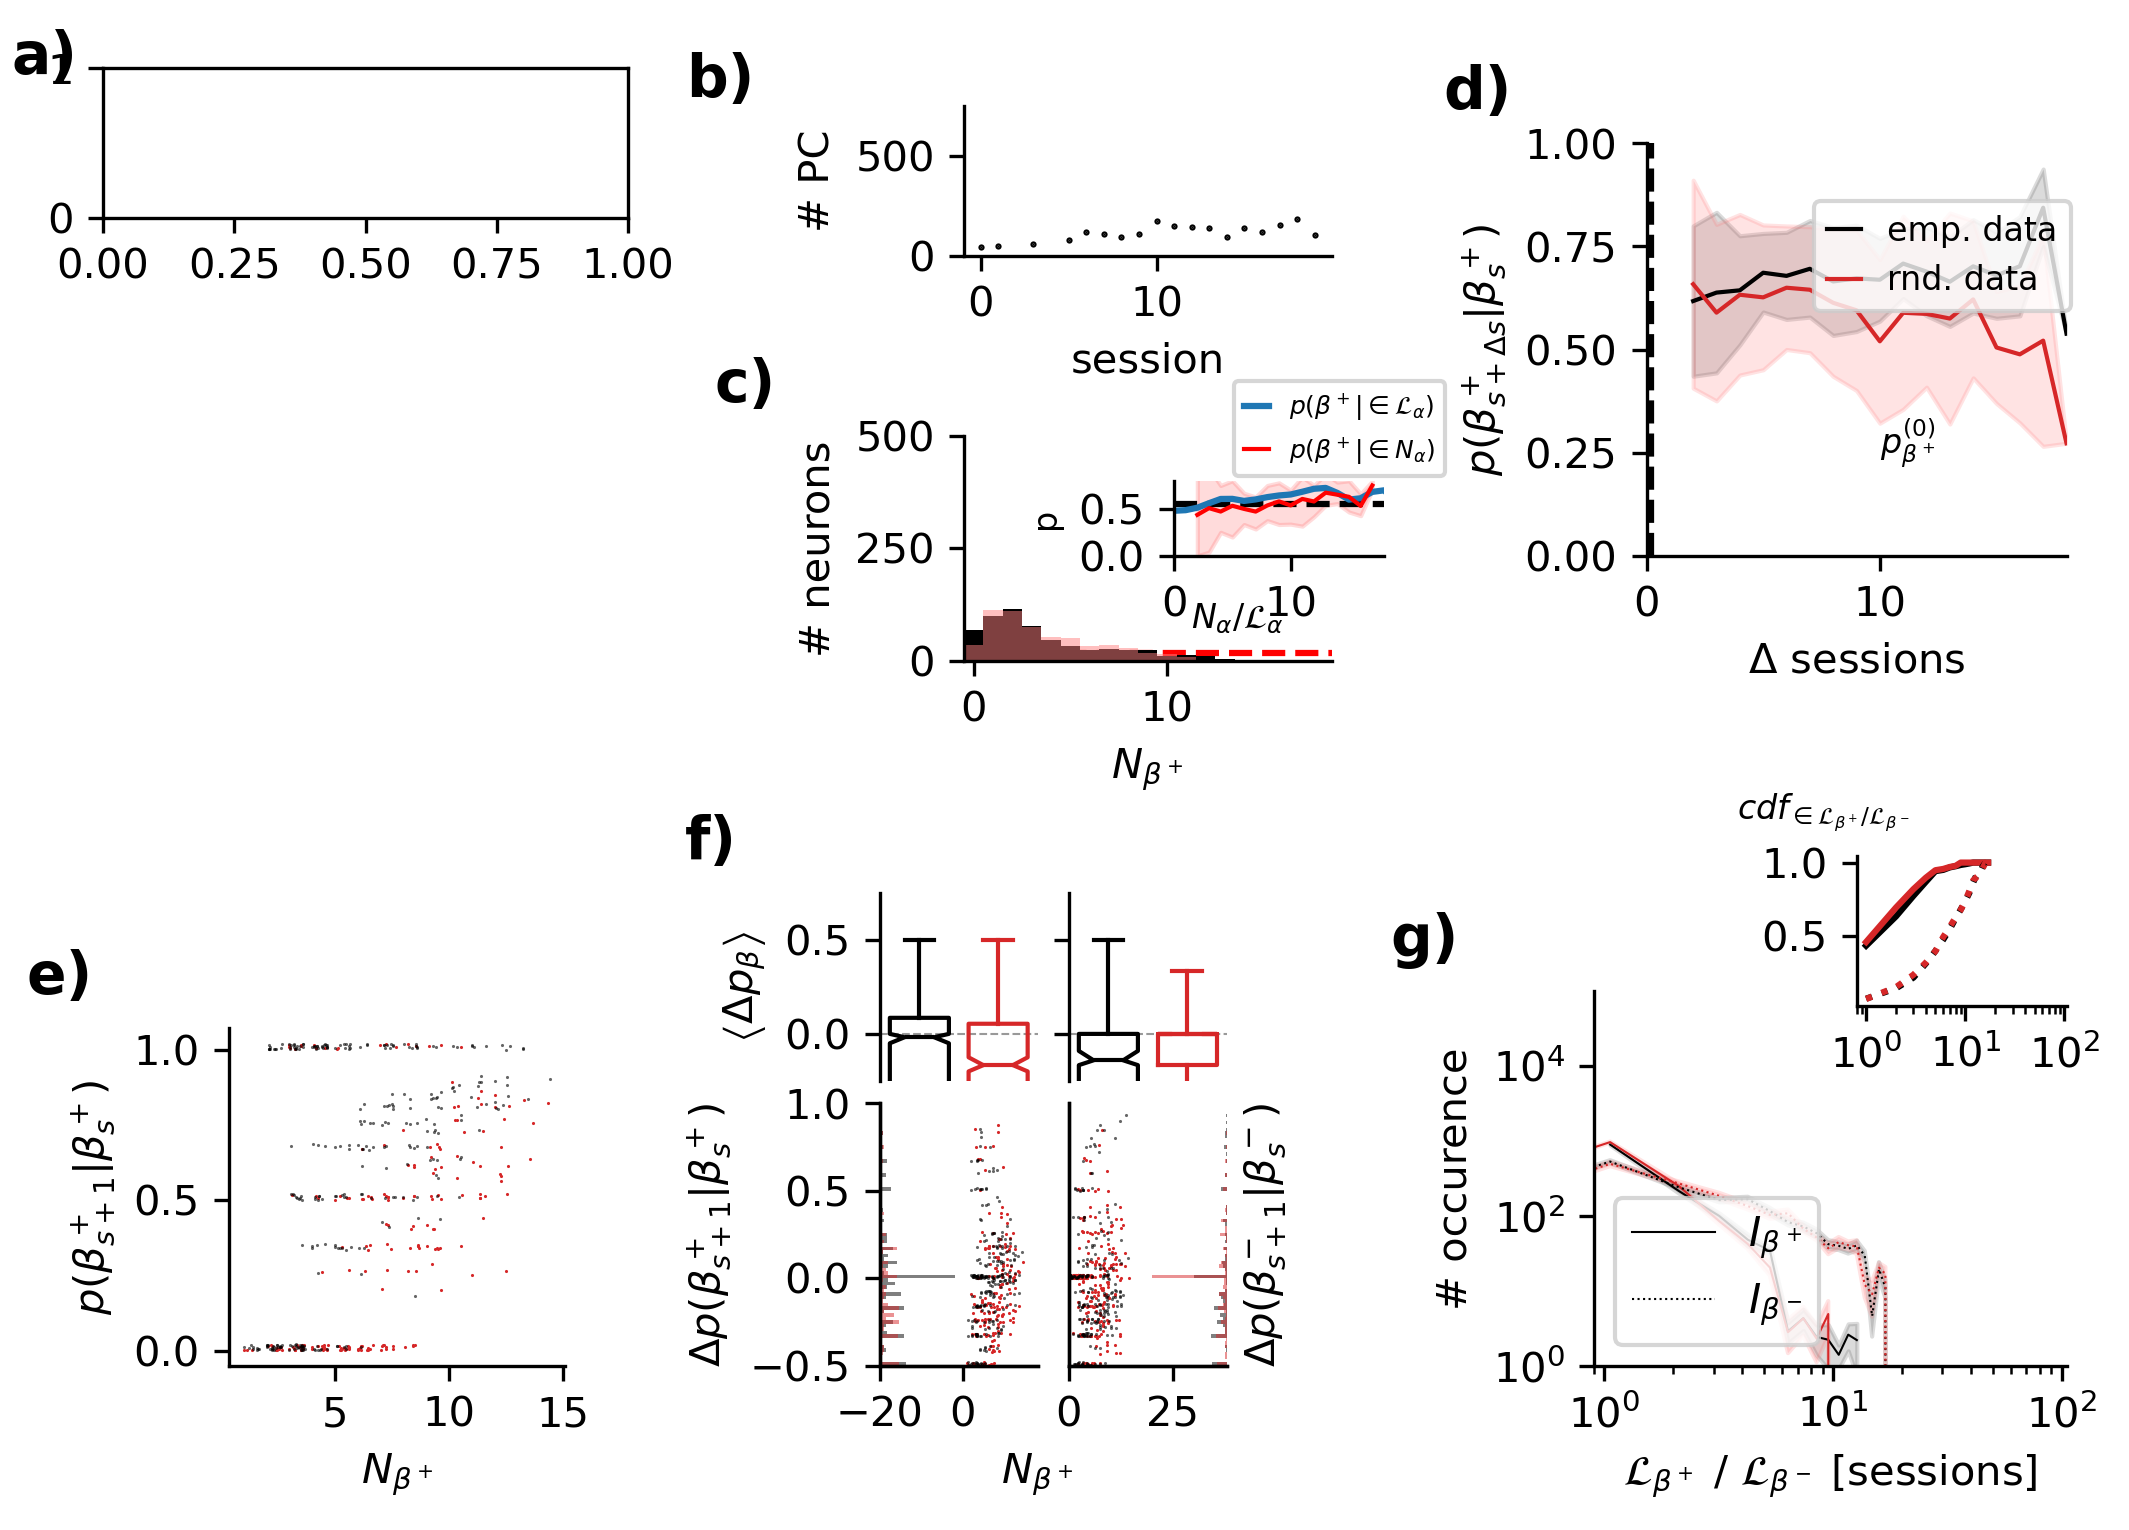

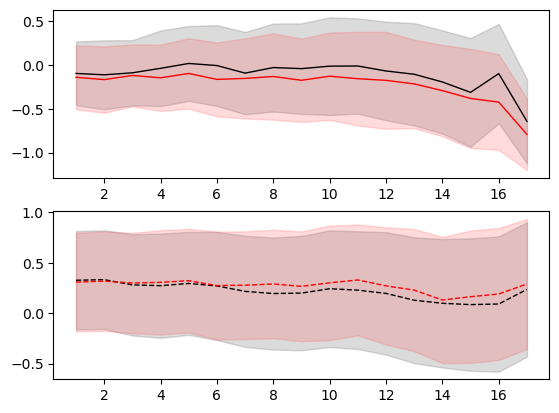

'\n\t[x] check calculation of shift\n\t[x] check if matching results and neuron identities match\n\t[x] check if maybe thresholding for rate gives better results?\n'

In [105]:
c.setup_plots()
c.plot_turnover_mechanism('PC')
# c.update_status(A_thr=1,A0_thr=0,reliability_thr=0.2,sigma_thr=.5,fr_thr=0.01,CI_thr=0)
# c.plot_recurrence()
# c.plot_stats()
# c.plot_PC_stats()
# c.plot_firingmaps()
# c.plot_stability_dynamics()
# c.plot_param_dependent_stability(iterate_var=('fr_thr',np.linspace(0.0,0.1,6)))
# c.plot_network_dynamics()
# c.plot_coding_stats()
# c.plot_neuron_remapping()
# c.plot_neuron_examples()
# c.plot_pv_correlations()
# c.plot_example_draw()
# c.plot_corr_pairs()
# c.plot_sdep_stability()
# c.plot_alt_pf_detection()
# c.plot_multi_modes()
"""
	[x] check calculation of shift
	[x] check if matching results and neuron identities match
	[x] check if maybe thresholding for rate gives better results?
"""

In [14]:
c.compare['shifts_distr'].shape
# c.update_status(fr_thr=0.1)
# c.compareSessions()
# c.stats.keys()

# from utils import load_data
# ld = load_data(c.paths['place_field_detection'][0])
# ld['fields']['parameter']['global']['A0'].shape

(8393, 40)

In [37]:

from placefield_dynamics.neuron_matching.neuron_matching_analysis import neuron_matching_analysis
m = neuron_matching_analysis(mousePath=c.path_mouse, paths=c.paths['neuron_detection'],matlab=False,suffix='redetected')

m.load_model()
m.dynamic_fit()
m.load_registration()
m.load_data()

"""
	TODO:
		[ ] fix some plotting in matching
        [ ] alignment['corr'] should have value "1" for first proper session, but currently has 0
        [ ] mutual information currently missing in cluster_analysis - readd to get_Stats
        [ ] what to do about bins with 'steps' in p_x?
        
"""

../../data/579ad/matching/match_model_redetected.pkl
found proper fit @times=0
../../data/579ad/matching/neuron_registration_redetected.pkl
../../data/579ad/matching/matching_data_redetected.pkl


'\n\tTODO:\n\t\t[ ] fix some plotting in matching\n        [ ] alignment[\'corr\'] should have value "1" for first proper session, but currently has 0\n        [ ] mutual information currently missing in cluster_analysis - readd to get_Stats\n        [ ] what to do about bins with \'steps\' in p_x?\n        \n'

uhm... appears to be broken: are footprint locations not corrected for shift?


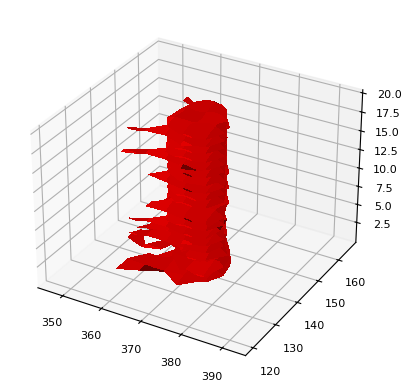

In [46]:
# m.plot_cluster_stats()
# m.plot_fit_results()
# m.plot_model()

# m.plot_alignment_statistics(s_compare=1)
# m.paths
m.plot_footprints(c=4)
# m.plot_matches(s=2,s_ref=1)